In [46]:
import pandas as pd 
import matplotlib.pyplot as plt

In [48]:
data = {
    'Order_ID': ['ORD001', 'ORD002', 'ORD003', 'ORD004', 'ORD005'],
    'Date': pd.to_datetime(['2023-01-15', '2023-02-10', '2023-03-05', '2023-04-12', '2023-05-20']),
    'Customer_ID': ['CUST01', 'CUST02', 'CUST03', 'CUST01', 'CUST04'],
    'Product': ['Laptop', 'Mouse', 'Tablet', 'Monitor', 'Keyboard'],
    'Category': ['Electronics', 'Accessories', 'Electronics', 'Electronics', 'Accessories'],
    'Quantity': [1, 3, 2, 1, 4],
    'Unit_Price': [1200, 25, 600, 300, 45],
    'Region': ['North', 'South', 'East', 'West', 'North']
}
df = pd.DataFrame(data)
df

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Unit_Price,Region
0,ORD001,2023-01-15,CUST01,Laptop,Electronics,1,1200,North
1,ORD002,2023-02-10,CUST02,Mouse,Accessories,3,25,South
2,ORD003,2023-03-05,CUST03,Tablet,Electronics,2,600,East
3,ORD004,2023-04-12,CUST01,Monitor,Electronics,1,300,West
4,ORD005,2023-05-20,CUST04,Keyboard,Accessories,4,45,North


In [50]:
df['Data_time'] = pd.to_datetime(df['Date'])
df

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Unit_Price,Region,Data_time
0,ORD001,2023-01-15,CUST01,Laptop,Electronics,1,1200,North,2023-01-15
1,ORD002,2023-02-10,CUST02,Mouse,Accessories,3,25,South,2023-02-10
2,ORD003,2023-03-05,CUST03,Tablet,Electronics,2,600,East,2023-03-05
3,ORD004,2023-04-12,CUST01,Monitor,Electronics,1,300,West,2023-04-12
4,ORD005,2023-05-20,CUST04,Keyboard,Accessories,4,45,North,2023-05-20


In [52]:
df["Total_Sales"] = df['Quantity'] * df['Unit_Price']
df

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Unit_Price,Region,Data_time,Total_Sales
0,ORD001,2023-01-15,CUST01,Laptop,Electronics,1,1200,North,2023-01-15,1200
1,ORD002,2023-02-10,CUST02,Mouse,Accessories,3,25,South,2023-02-10,75
2,ORD003,2023-03-05,CUST03,Tablet,Electronics,2,600,East,2023-03-05,1200
3,ORD004,2023-04-12,CUST01,Monitor,Electronics,1,300,West,2023-04-12,300
4,ORD005,2023-05-20,CUST04,Keyboard,Accessories,4,45,North,2023-05-20,180


In [54]:
Check_null = df.isnull().sum()
Check_null

Order_ID       0
Date           0
Customer_ID    0
Product        0
Category       0
Quantity       0
Unit_Price     0
Region         0
Data_time      0
Total_Sales    0
dtype: int64

In [56]:
df.head(4)

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Unit_Price,Region,Data_time,Total_Sales
0,ORD001,2023-01-15,CUST01,Laptop,Electronics,1,1200,North,2023-01-15,1200
1,ORD002,2023-02-10,CUST02,Mouse,Accessories,3,25,South,2023-02-10,75
2,ORD003,2023-03-05,CUST03,Tablet,Electronics,2,600,East,2023-03-05,1200
3,ORD004,2023-04-12,CUST01,Monitor,Electronics,1,300,West,2023-04-12,300


In [58]:
def total_revenue():
    total_revenues = 0
    for revenue in df['Total_Sales']:
        total_revenues+=revenue
    return total_revenues
print(f"Total revenue is {total_revenue()}")

        

Total revenue is 2955


In [60]:
average_ordervalue = df.groupby('Order_ID')['Total_Sales'].sum().mean()
average_ordervalue

591.0

In [62]:
unique_customer = df['Customer_ID'].nunique()
unique_customer

4

In [64]:
most_order = df.groupby('Customer_ID')['Quantity'].sum().idxmax()
most_order

'CUST04'

In [66]:
most_product = df.groupby('Product')['Quantity'].sum().idxmax()
most_product

'Keyboard'

In [68]:
total_revenue = df.groupby('Product')['Total_Sales'].sum()
total_revenue

Product
Keyboard     180
Laptop      1200
Monitor      300
Mouse         75
Tablet      1200
Name: Total_Sales, dtype: int64

In [99]:
total_revenues = df.groupby('Category')['Total_Sales'].sum()
total_revenues

Category
Accessories     255
Electronics    2700
Name: Total_Sales, dtype: int64

In [72]:
total_revenue = df.groupby('Region')['Total_Sales'].sum()
total_revenue

Region
East     1200
North    1380
South      75
West      300
Name: Total_Sales, dtype: int64

In [74]:
highest_revenue = df.groupby('Region')['Total_Sales'].sum().idxmax()
highest_revenue

'North'

In [76]:
highest_average = df.groupby('Category')['Total_Sales'].sum().idxmax()
highest_average

'Electronics'

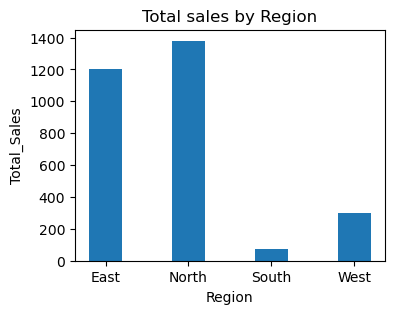

In [127]:
plt.figure(figsize=(4, 3))
plt.bar(total_revenue.index,total_revenue.values,width=0.4)
plt.xlabel("Region")
plt.ylabel("Total_Sales")
plt.title("Total sales by Region")
plt.show()

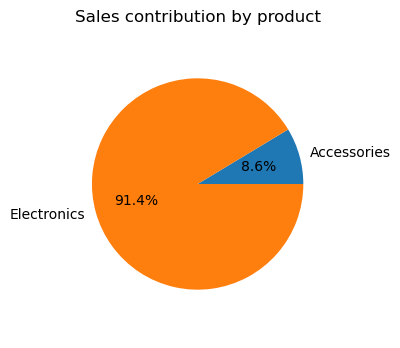

In [119]:

plt.figure(figsize=(3, 4))
plt.pie(total_revenues.values, labels=total_revenues.index,autopct='%1.1f%%')
plt.title("Sales contribution by product")
plt.axis('equal')
plt.show()

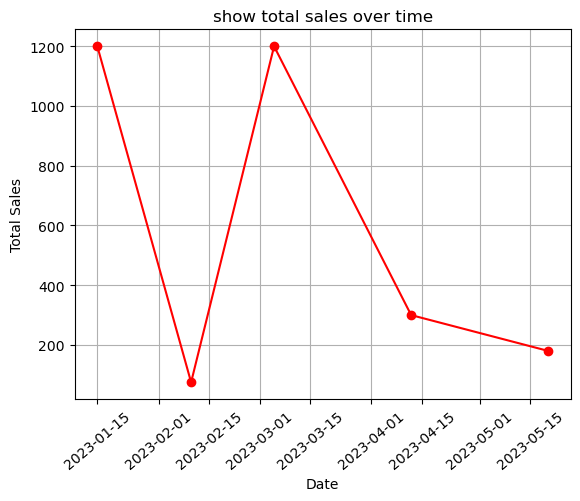

In [166]:
plt.plot(df['Date'],df['Total_Sales'],marker = 'o',color = 'red')
plt.title("show total sales over time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=40)
plt.grid(True)
plt.show()